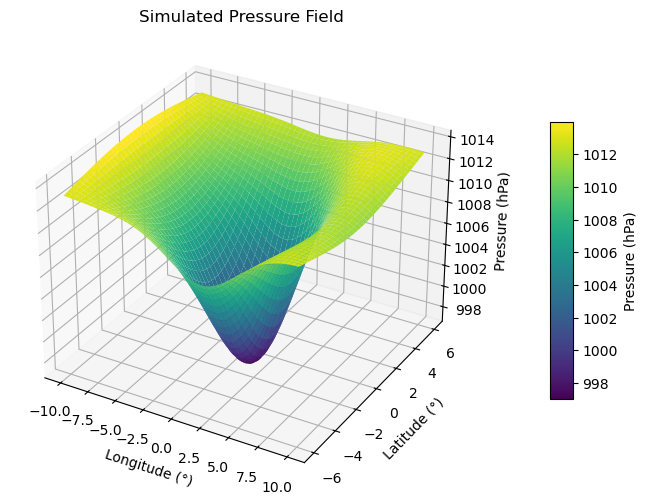

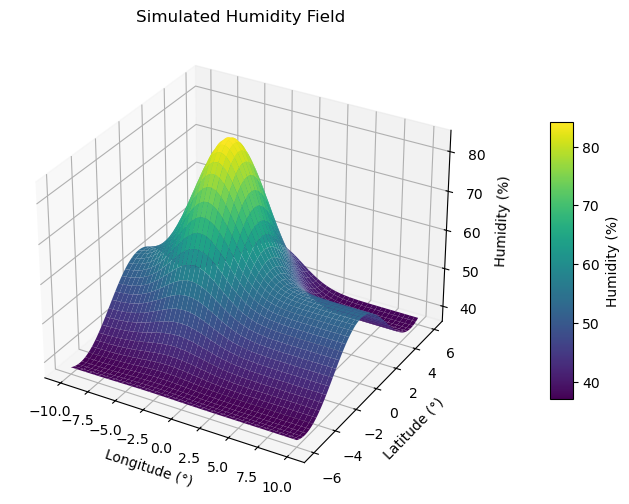

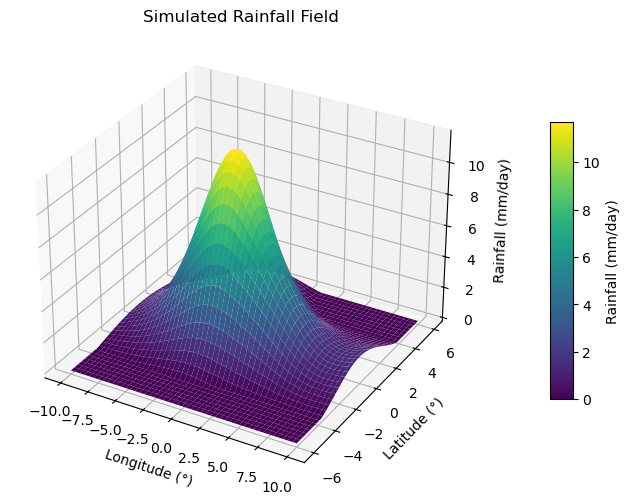

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# 1. Create Geographic Grid
# -----------------------------
lon = np.linspace(-10, 10, 240)   # Longitude range
lat = np.linspace(-6, 6, 160)     # Latitude range
LON, LAT = np.meshgrid(lon, lat)

# -----------------------------
# 2. Simulate Meteorological Data
# -----------------------------
# Pressure (hPa) - baseline with low-pressure system
pressure = (
    1013.0
    - 18.0 * np.exp(-((LON - 2.0) ** 2 + (LAT + 1.0) ** 2) / 18.0)
    + 3.5 * np.sin(0.35 * LON) * np.cos(0.25 * LAT)
)

# Humidity (%) - moist region + latitudinal variation
humidity = (
    45.0
    + 35.0 * np.exp(-((LON + 3.0) ** 2 + (LAT - 2.0) ** 2) / 12.0)
    + 8.0 * np.cos(0.6 * LAT)
)
humidity = np.clip(humidity, 0, 100)  # realistic bounds

# Rainfall (mm/day) - linked to humidity and low pressure
rainfall = np.clip((humidity - 40.0) * (1016.0 - pressure) / 40.0, 0, None)

# -----------------------------
# 3. Function for 3D Surface Plot
# -----------------------------
def plot_3d(X, Y, Z, zlabel, title):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

    ax.set_xlabel("Longitude (°)")
    ax.set_ylabel("Latitude (°)")
    ax.set_zlabel(zlabel)
    ax.set_title(title)

    fig.colorbar(surf, shrink=0.6, aspect=12, pad=0.1, label=zlabel)
    plt.show()

# -----------------------------
# 4. Plot all three variables
# -----------------------------
plot_3d(LON, LAT, pressure, "Pressure (hPa)", "Simulated Pressure Field")
plot_3d(LON, LAT, humidity, "Humidity (%)", "Simulated Humidity Field")
plot_3d(LON, LAT, rainfall, "Rainfall (mm/day)", "Simulated Rainfall Field")